In [2]:
!pip install wikipedia-api

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.8.1-py3-none-any.whl size=15384 sha256=87c5e2f3450bac5ec69b757ccde9f1f7e696c75764e1d7a387b1072186036894
  Stored in directory: /root/.cache/pip/wheels/0b/0f/39/e8214ec038ccd5aeb8c82b957289f2f3ab2251febeae5c2860
Successfully built wikipedia-api


In [9]:
import requests
from bs4 import BeautifulSoup
import wikipediaapi
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from wordcloud import WordCloud
from PIL import Image
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation

In [10]:
# Descargar stopwords en español
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Lista ampliada de mujeres científicas
mujeres_cientificas = [
    "Marie Curie", "Rosalind Franklin", "Ada Lovelace", "Dorothy Crowfoot Hodgkin", "Barbara McClintock",
    "Lise Meitner", "Rachel Carson", "Emmanuelle Charpentier", "Jennifer Doudna", "Jane Goodall",
    "Vera Rubin", "Chien-Shiung Wu", "Maria Goeppert-Mayer", "Gertrude B. Elion", "Françoise Barré-Sinoussi",
    "Tu Youyou", "May-Britt Moser", "Christiane Nüsslein-Volhard", "Rita Levi-Montalcini", "Elizabeth Blackburn",
    "Carol W. Greider", "Margaret Hamilton", "Katherine Johnson", "Dorothy Vaughan", "Mary Jackson",
    "Flossie Wong-Staal", "Lynn Margulis", "Barbara Liskov", "Shirley Ann Jackson", "Eleanor Anne Ormerod",
    "Mary Anning", "Hypatia de Alejandría", "Sophie Germain", "Emilie du Châtelet", "Maria Mitchell",
    "Henrietta Swan Leavitt", "Annie Jump Cannon", "Cecilia Payne-Gaposchkin", "Lise Meitner",
    "Marie Tharp", "Jocelyn Bell Burnell", "Gerty Cori", "Dorothy Crowfoot Hodgkin", "Rosalyn Yalow",
    "Jean Purdy", "Margarita Salas", "Ángela Ruiz Robles", "Susan Solomon", "Patricia Bath",
    "Tu Youyou", "Françoise Barré-Sinoussi", "May-Britt Moser", "Christiane Nüsslein-Volhard"
]


In [7]:
# Configuración de Wikipedia
wiki_wiki = wikipediaapi.Wikipedia(language='es',
                                 user_agent='my_bot/1.0 (My_bot_description; my_email@example.com)') # Provide a descriptive user agent

def obtener_descripcion(nombre):
    """Obtiene la primera sección del artículo de Wikipedia de la científica."""
    try:
        page = wiki_wiki.page(nombre)
        if page.exists():
            return page.summary
        else:
            return None
    except Exception as e:
        print(f"Error obteniendo {nombre}: {e}")
        return None

In [8]:
# Obtener descripciones
descripciones = {nombre: obtener_descripcion(nombre) for nombre in mujeres_cientificas}

In [11]:
descripciones

{'Marie Curie': 'Maria Salomea Skłodowska-Curie,[A]\u200b[B]\u200b más conocida como Marie Curie[C]\u200b[B]\u200b o Madame Curie (Varsovia, 7 de noviembre de 1867-Passy, 4 de julio de 1934), fue una física y química de origen polaco. Pionera en el campo de la radiactividad, es la primera y única persona en recibir dos premios Nobel en distintas especialidades científicas: Física y Química.[D]\u200b También fue la primera mujer en ocupar el puesto de profesora en la Universidad de París y la primera en recibir sepultura con honores en el Panteón de París por méritos propios en 1995.[E]\u200b\nNació en Varsovia, en lo que entonces era el Zarato de Polonia (territorio administrado por el Imperio ruso). Estudió clandestinamente en la «universidad flotante» de Varsovia y comenzó su formación científica en dicha ciudad. En 1891, a los 24 años, siguió a su hermana mayor Bronisława Dłuska a París, donde culminó sus estudios y llevó a cabo sus trabajos científicos más sobresalientes. Compartió

In [12]:
# Crear DataFrame
df = pd.DataFrame(descripciones.items(), columns=['Nombre', 'Descripcion'])
df.dropna(inplace=True)

In [13]:
# Preprocesamiento del texto
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^a-záéíóúüñ ]', '', texto)
    palabras = texto.split()
    palabras = [p for p in palabras if p not in stop_words]
    return " ".join(palabras)

df['Descripcion'] = df['Descripcion'].apply(limpiar_texto)


In [14]:
# Vectorización con TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Descripcion'])

In [15]:
# Calcular distancia del coseno
cosine_sim = cosine_similarity(X_tfidf)

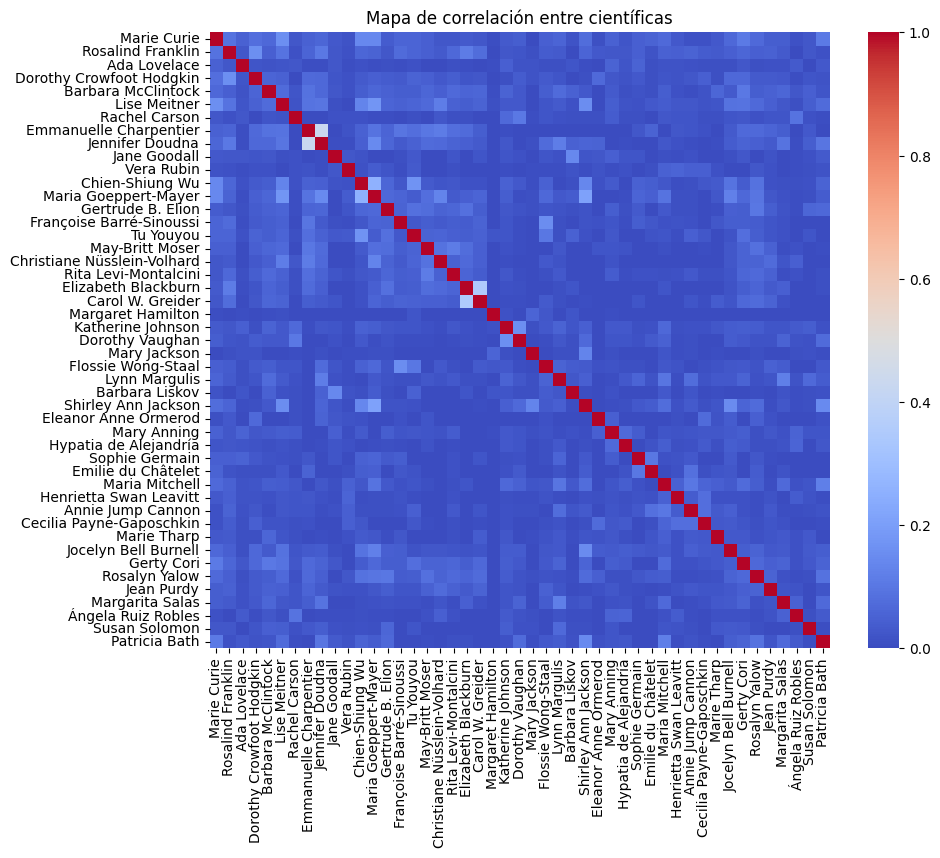

In [16]:
# Heatmap de la matriz de similitud
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim, annot=False, cmap='coolwarm', xticklabels=df['Nombre'], yticklabels=df['Nombre'])
plt.title("Mapa de correlación entre científicas")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [17]:
# Aplicar K-Means
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_tfidf)


In [18]:
# Mostrar los clusters
df[['Nombre', 'Cluster']].sort_values('Cluster')

,Nombre,Cluster
44,Ángela Ruiz Robles,0
42,Jean Purdy,0
6,Rachel Carson,0
20,Carol W. Greider,0
17,Christiane Nüsslein-Volhard,0
23,Dorothy Vaughan,1
41,Rosalyn Yalow,1
39,Jocelyn Bell Burnell,1
28,Shirley Ann Jackson,1
24,Mary Jackson,1


from matplotlib import pyplot as plt
_df_0['Cluster'].plot(kind='hist', bins=20, title='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Cluster']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Cluster'}, axis=1)
              .sort_values('Cluster', ascending=True))
  xs = counted['Cluster']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Cluster', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Cluster')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_2['Cluster'].plot(kind='line', figsize=(8, 4), title='Cluster')
plt.gca().spines[['top', 'right']].set_visible(False)

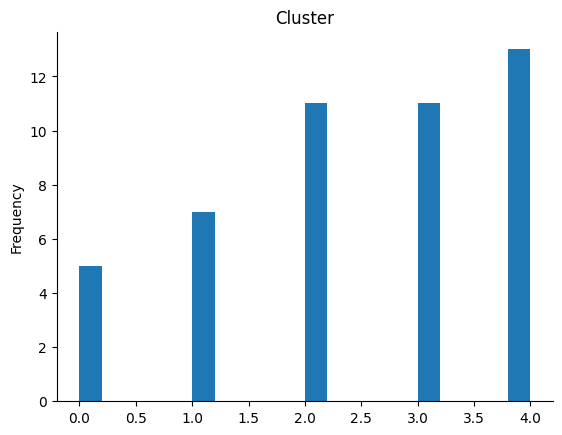

In [19]:
from matplotlib import pyplot as plt
_df_0['Cluster'].plot(kind='hist', bins=20, title='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

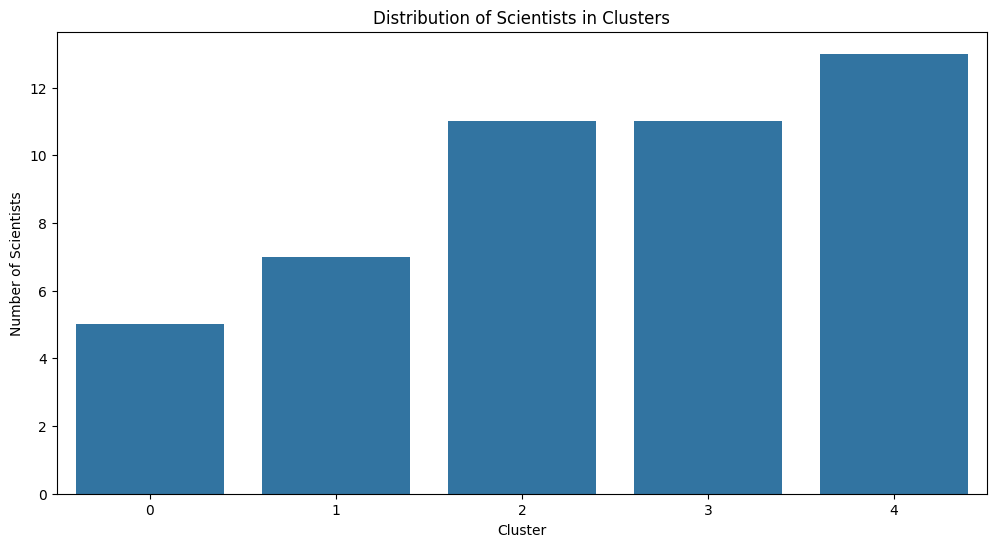

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

cluster_counts = df.groupby('Cluster')['Nombre'].count().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster', y='Nombre', data=cluster_counts)
plt.title('Distribution of Scientists in Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Scientists')
plt.xticks(rotation=0)
plt.show()

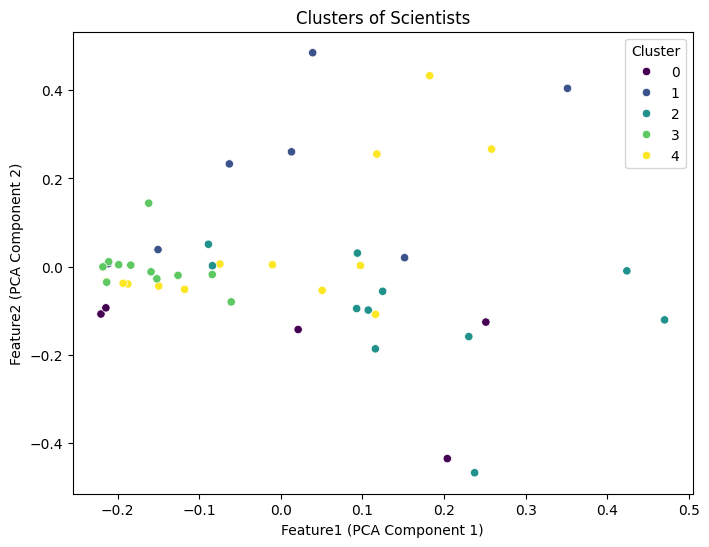

In [22]:
from sklearn.decomposition import PCA

# Reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())  # Convert to dense array if necessary

# Create a new DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(data=X_pca, columns=['Feature1', 'Feature2'])
pca_df['Cluster'] = df['Cluster']

# Now you can create the scatter plot using the new DataFrame
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('Clusters of Scientists')
plt.xlabel('Feature1 (PCA Component 1)')
plt.ylabel('Feature2 (PCA Component 2)')
plt.show()

In [23]:
!pip install wordcloud
from collections import Counter
from wordcloud import WordCloud

def get_top_words(cluster_num, top_n=10):
    """Gets the top N words for a specific cluster."""
    cluster_text = " ".join(df[df['Cluster'] == cluster_num]['Descripcion'].tolist())
    words = cluster_text.split()
    word_counts = Counter(words)
    top_words = word_counts.most_common(top_n)
    return top_words

# Get top words for each cluster and create a table
for cluster_num in range(num_clusters):
    top_words = get_top_words(cluster_num)
    print(f"**Cluster {cluster_num}:**")
    print(pd.DataFrame(top_words, columns=['Word', 'Frequency']))
    print("\n")

**Cluster 0:**
        Word  Frequency
0      libro          8
1      junto          6
2     carson          5
3        the          5
4     premio          5
5  elizabeth          5
6     además          4
7    trabajo          4
8      nobel          4
9   medicina          4


**Cluster 1:**
             Word  Frequency
0          física         12
1           mujer         10
2         primera         10
3          premio          8
4       instituto          7
5            bell          6
6  estadounidense          5
7   afroamericana          5
8         burnell          5
9           nobel          4


**Cluster 2:**
          Word  Frequency
0       premio         16
1        nobel         13
2     medicina          9
3   fisiología          5
4         maíz          5
5     genética          5
6  galardonada          5
7   bioquímica          5
8      química          5
9          vih          5


**Cluster 3:**
             Word  Frequency
0  estadounidense         13
1      

In [24]:
for cluster_num in range(num_clusters):
    print(f"**Cluster {cluster_num}:**")
    names_in_cluster = df[df['Cluster'] == cluster_num]['Nombre'].tolist()
    print(names_in_cluster)
    print("\n")

**Cluster 0:**
['Rachel Carson', 'Christiane Nüsslein-Volhard', 'Carol W. Greider', 'Jean Purdy', 'Ángela Ruiz Robles']


**Cluster 1:**
['Maria Goeppert-Mayer', 'Dorothy Vaughan', 'Mary Jackson', 'Shirley Ann Jackson', 'Jocelyn Bell Burnell', 'Rosalyn Yalow', 'Patricia Bath']


**Cluster 2:**
['Barbara McClintock', 'Emmanuelle Charpentier', 'Jennifer Doudna', 'Gertrude B. Elion', 'Françoise Barré-Sinoussi', 'Tu Youyou', 'May-Britt Moser', 'Rita Levi-Montalcini', 'Elizabeth Blackburn', 'Emilie du Châtelet', 'Susan Solomon']


**Cluster 3:**
['Vera Rubin', 'Katherine Johnson', 'Lynn Margulis', 'Barbara Liskov', 'Hypatia de Alejandría', 'Maria Mitchell', 'Henrietta Swan Leavitt', 'Annie Jump Cannon', 'Cecilia Payne-Gaposchkin', 'Marie Tharp', 'Margarita Salas']


**Cluster 4:**
['Marie Curie', 'Rosalind Franklin', 'Ada Lovelace', 'Dorothy Crowfoot Hodgkin', 'Lise Meitner', 'Jane Goodall', 'Chien-Shiung Wu', 'Margaret Hamilton', 'Flossie Wong-Staal', 'Eleanor Anne Ormerod', 'Mary Anning',

In [26]:
# Mostrar los tópicos
from sklearn.decomposition import LatentDirichletAllocation

# Create and fit the LDA model
lda = LatentDirichletAllocation(n_components=num_clusters, random_state=42) # Assuming num_clusters is defined
lda.fit(X_tfidf)

for idx, topic in enumerate(lda.components_):
    print(f"Tópico {idx}: ")
    print(" ".join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]))
    print("\n")

Tópico 0: 
chimpancés china primera bell liskov científica conocida barbara jane hamilton


Tópico 1: 
astronomía hipatia émilie chtelet wu teorías astrónoma atmosférica física estadounidense


Tópico 2: 
española nobel medicina primos germain bioquímica noviembre cefeidas números moser


Tópico 3: 
doctorado nobel meitner desarrollo purdy sida física premio vih jackson


Tópico 4: 
inglesa elizabeth febrero anne ganadora química física medicina nobel premio




In [27]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 21.5 MB/s eta 0:00:00


In [29]:
import pyLDAvis
import pyLDAvis.lda_model

In [30]:
# Create the visualization
pyLDAvis.enable_notebook() # For use in Jupyter notebooks
vis = pyLDAvis.lda_model.prepare(lda, X_tfidf, tfidf_vectorizer) #Updated to use lda_model

# Display the visualization
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.011528 -0.001616       1        1  31.594404
0      0.004973  0.003615       2        1  20.006537
1      0.005163 -0.007675       3        1  17.926924
3      0.000516  0.005459       4        1  17.773595
2      0.000876  0.000217       5        1  12.698539, topic_info=            Term      Freq     Total Category  logprob  loglift
1128     jackson  0.000000  0.000000  Default  30.0000  30.0000
963     hamilton  0.000000  0.000000  Default  29.0000  29.0000
1375       moser  0.000000  0.000000  Default  28.0000  28.0000
1131        jane  0.000000  0.000000  Default  27.0000  27.0000
2102         vih  0.000000  0.000000  Default  26.0000  26.0000
...          ...       ...       ...      ...      ...      ...
1315    medicina  0.043872  0.325501   Topic5  -6.8617   0.0596
225    blackburn  0.039280  0.217355   Topic5  -6.9723   0.3529
853   fisiología  0.040114  0.244441   Topic5  -6.9513   0.2564
1432       nobel  0.043738  0.449388   Topic5  -6.8648  -0.2660
1641      premio  0.042985  0.504037   Topic5  -6.8822  -0.3981

[237 rows x 6 columns], token_table=Empty DataFrame
Columns: [Topic, Freq, Term]
Index: [], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 2, 4, 3])

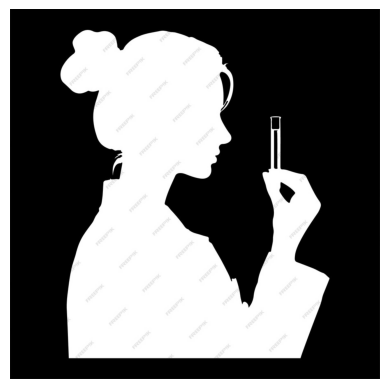

In [38]:
from PIL import Image
import numpy as np

# Cargar imagen en escala de grises
image = Image.open("/content/silueta muje.jpg").convert("L")

# Convertir a numpy array y normalizar (255 = blanco, 0 = negro)
mask = np.array(image)

# Asegurar que la silueta sea negra y el fondo blanco
if mask.mean() > 128:  # Si la imagen es mayormente blanca, invertirla
    mask = 255 - mask

# Mostrar la imagen para verificar
import matplotlib.pyplot as plt
plt.imshow(mask, cmap='gray')
plt.axis("off")
plt.show()

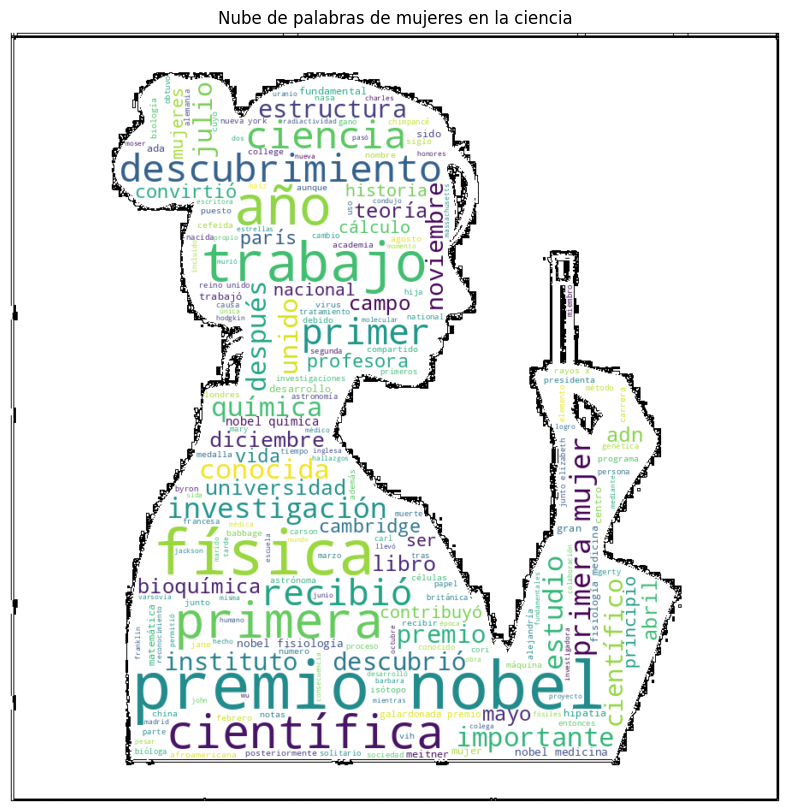

In [41]:
# Generar nube de palabras con silueta de mujer
mask = np.array(Image.open("/content/silueta muje.jpg"))  # Se necesita una imagen de silueta de mujer

# Remove "estadounidense" from the descriptions
text = " ".join(df['Descripcion'].str.replace("estadounidense", "").tolist())

wordcloud = WordCloud(width=800, height=800, background_color='white', mask=mask, contour_color='black', contour_width=1).generate(text)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de palabras de mujeres en la ciencia")
plt.show()